In [59]:
# number 2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# ODEs
def dvdt(v, IK, INa, Il):
	return 1/Cm * (I - (IK + INa + Il))

def dndt(v, n):
	return An(v) * (1 - n) - (Bn(v) * (n))

def dmdt(v, m):
	return Am(v) * (1 - m) - (Bm(v) * (m))

def dhdt(v, h):
	return Ah(v) * (1 - h) - (Bh(v) * (h))

# variables w/r/t v
def An(v):
	return (0.01 * (v + 50)) / (1 - np.exp((-(v + 50)) / 10))

def Bn(v):
	return 0.125 * np.exp(-(v + 60) / 80)

def Am(v):
	return (0.1 * (v + 35)) / (1 - np.exp((-(v + 35)) / 10))

def Bm(v):
	return 4.0 * np.exp(-0.0556 * (v + 60))

def Ah(v):
	return 0.07 * np.exp(-0.05 * (v + 60))

def Bh(v):
	return 1 / (1 + np.exp(-0.1 * (v + 30)))

# constants
Cm = 0.01
ENa = 55.17
EK = -72.14
El = -49.42
g_bar_Na = 1.2
g_bar_K = 0.36
g_bar_l = 0.003

## vars for forward Euler simulation
# time vars
dt = 0.01          # timestep
ms_to_plot = 30    # miliseconds to simulate
I = 0.2 	       # external current applied

## initialize stored vars with first values
v_array = [-60]
n_array = [An(v_array[0]) / (An(v_array[0]) + Bn(v_array[0])) ]
m_array = [Am(v_array[0]) / (Am(v_array[0]) + Bm(v_array[0])) ]
h_array = [Ah(v_array[0]) / (Ah(v_array[0]) + Bh(v_array[0])) ]

# iterate
t = np.arange(0, ms_to_plot, dt)
for i in range(0, len(t) - 1):

    # grab previous stored voltage and k+/na+ channel states
    v = v_array[i]
    n = n_array[i]
    m = m_array[i]
    h = h_array[i]

    # calculate conductances
    gK = g_bar_K * n**4
    gNa = g_bar_Na * (m**3) * h
    gl = g_bar_l

    # calculate currents (conductance * driving force)
    IK = gK * (v - EK)
    INa = gNa * (v - ENa)
    Il = gl * (v - El)

    # calculate v/n/m/h change by taking small timestep
    # e.g. new voltage is voltage + (timestep * voltage change)
    new_v = v + dt * dvdt(v, IK, INa, Il)
    new_n = n + dt * dndt(v, n)
    new_m = m + dt * dmdt(v, m)
    new_h = h + dt * dhdt(v, h)
    
    # save calculated values for plotting later
    n_array.append(new_n)
    m_array.append(new_m)
    h_array.append(new_h)
    v_array.append(new_v)



Text(0.5, 0, 'time (ms)')

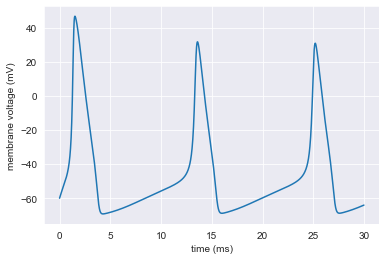

In [60]:
# plot and decorate
plt.figure()
plt.plot(t, v_array)
plt.ylabel('membrane voltage (mV)')
plt.xlabel('time (ms)')

In [61]:
# exercise:
# 1) Fill in Euler approximation loop with paper side-by-side
# 2) tweak some parameters. external current. timestep size. duration of recording

# student contributions:
# 1) find parameters from paper - might be hard b/c of tweaks
# 2) explain biophysical underpinnings of different parts of trace + next graphs

Text(0.5, 0, 'time (ms)')

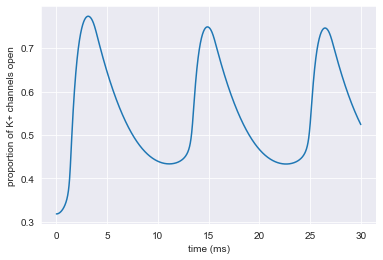

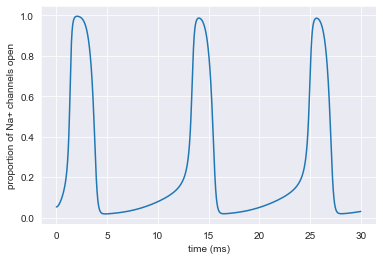

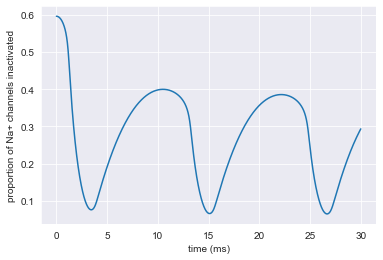

In [62]:
plt.figure()
plt.plot(t, n_array)
plt.ylabel('proportion of K+ channels open')
plt.xlabel('time (ms)')

plt.figure()
plt.plot(t, m_array)
plt.ylabel('proportion of Na+ channels open')
plt.xlabel('time (ms)')

plt.figure()
plt.plot(t, h_array)
plt.ylabel('proportion of Na+ channels inactivated')
plt.xlabel('time (ms)')